# Bayesian Exploration with Xopt for LCLS MOBO

## Explore LCLS X-ray intensity as a function of quad strengths

Input parameters:
- LI26 quads: QUAD:LI26:201 - QUAD:LI26:901

Output parameters:
- FEL pulse energy for the soft and hard beamlines:
- Soft: EM2K0:XGMD:HPS:AvgPulseIntensity
- Hard: GDET:FEE1:241:ENRC, GDET:FEE1:242:ENRC

Constraints:
- Beam loss monitors: CBLM:UNDH:1375:I0_LOSS, CBLM:UNDS:1375:I0_LOSS

In [8]:
# Import the class
from xopt import Xopt
from xopt.bayesian.algorithms import bayesian_exploration


In [9]:
# To see log messages
from xopt import output_notebook
output_notebook()

In [10]:
import yaml
# Make a proper input file. 
VOCS="""
vocs:
  name: LCLS_MOBO
  variables:
    QUAD:LI26:201: [0, 1]
    QUAD:LI26:301: [0, 1]
    QUAD:LI26:401: [0, 1]
    QUAD:LI26:501: [0, 1]
    QUAD:LI26:601: [0, 1]
    QUAD:LI26:701: [0, 1]
    QUAD:LI26:801: [0, 1]
    QUAD:LI26:901: [0, 1]
  objectives:
    EM2K0:XGMD:HPS:AvgPulseIntensity: None
  constraints:
    CBLM:UNDH:1375:I0_LOSS: [LESS_THAN, 1.0]
    CBLM:UNDS:1375:I0_LOSS: [LESS_THAN, 1.0]
  linked_variables: {}
  constants: {}
"""

# create list of inputs and outputs
inputs = []
for i in range(2, 10):
    inputs += [f'QUAD:LI26:{i}01']

outputs = [
    'EM2K0:XGMD:HPS:AvgPulseIntensity',
    'GDET:FEE1:241:ENRC',
    'GDET:FEE1:242:ENRC',
    'CBLM:UNDH:1375:I0_LOSS',
    'CBLM:UNDS:1375:I0_LOSS'
]

Define function to talk to epics

In [11]:
from typing import Dict
from epics import caget, caput, cainfo
from time import sleep
def make_epics_measurement(input_dict: Dict) -> Dict:
    # set inputs
    for name, val in input_dict.items():
        print(f'setting {name} to {val}')
        caput(name, val)

    # wait for inputs to settle
    sleep(1)

    # get output values
    output_dict = {}
    for ele in outputs:
        output_dict[ele] = caget(ele)

    return output_dict


Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
`name` keyword no longer allowed in vocs config, removing



            Xopt 
________________________________           
Version: 0.5.0+7.g47ae31b.dirty
Configured: True
Config as YAML:
xopt: {output_path: ''}
algorithm:
  name: bayesian_exploration
  options:
    n_initial_samples: 5
    initial_x: [1.0, 1.0]
    n_steps: 5
    generator_options: {batch_size: 1, use_gpu: false}
  function: xopt.bayesian.algorithms.bayesian_exploration
simulation:
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {}
  constants: {}

# Run BayesOpt


In [13]:
opt_results = bayesian_exploration(VOCS,
                                   make_epics_measurement,
                                   n_steps=10,
                                   n_initial_samples=1)

Starting at time 2021-12-04T04:51:05-06:00
started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x0000017A7191EBB0>
submitting initial candidates
starting optimization loop
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates


# Plot
- plot input space samples -> yellow points satisfy constraints and purple points do not

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


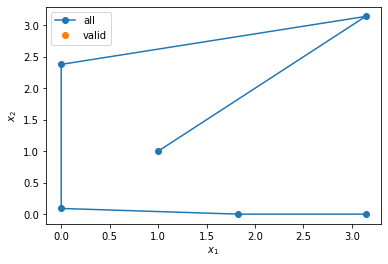

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# convert output to pandas dataframe for plotting
df = pd.DataFrame(opt_results)
df[inputs].plot()
df[outputs].plot()
